# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv(r'C:\Users\NAMEERA\Desktop\BCG customer churn ML/clean_data_after_eda.csv',index_col=0)
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2009-08-21   2015-08-31             189.95  ...              0.147600   
2      2010-04-16   2015-04-17              47.96  ...              0.167798   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.000000              0.000000             44.444710   
2              0.088409              0.000000             44.444710   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.592310   
2              0.000000              0.000000        44.612508   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.000000          0.000000      0  
2          0.088409          0.000000      0  

[3 rows x 53 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df= pd.read_csv(r'C:\Users\NAMEERA\Downloads\price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
diff.describe()


offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power
count                     16096.000000                    16096.000000
mean                         -0.004545                        0.279544
std                           0.012778                        1.432820
min                          -0.148477                      -44.266931
25%                          -0.008161                        0.000004
50%                          -0.005610                        0.162916
75%                          -0.003573                        0.177779
max                           0.168958                       40.728885

In [7]:
diff.shape

(16096, 3)

In [8]:
type(diff)

pandas.core.frame.DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='offpeak_diff_dec_january_energy', ylabel='Density'>

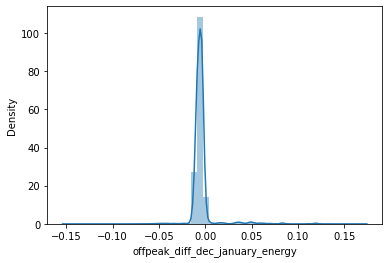

In [10]:
sns.distplot(diff['offpeak_diff_dec_january_energy'])

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='offpeak_diff_dec_january_power', ylabel='Density'>

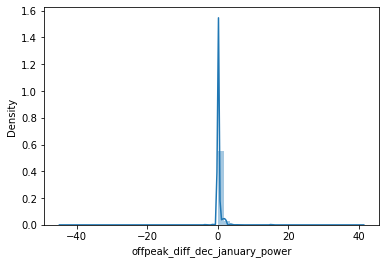

In [11]:
sns.distplot(diff['offpeak_diff_dec_january_power'])

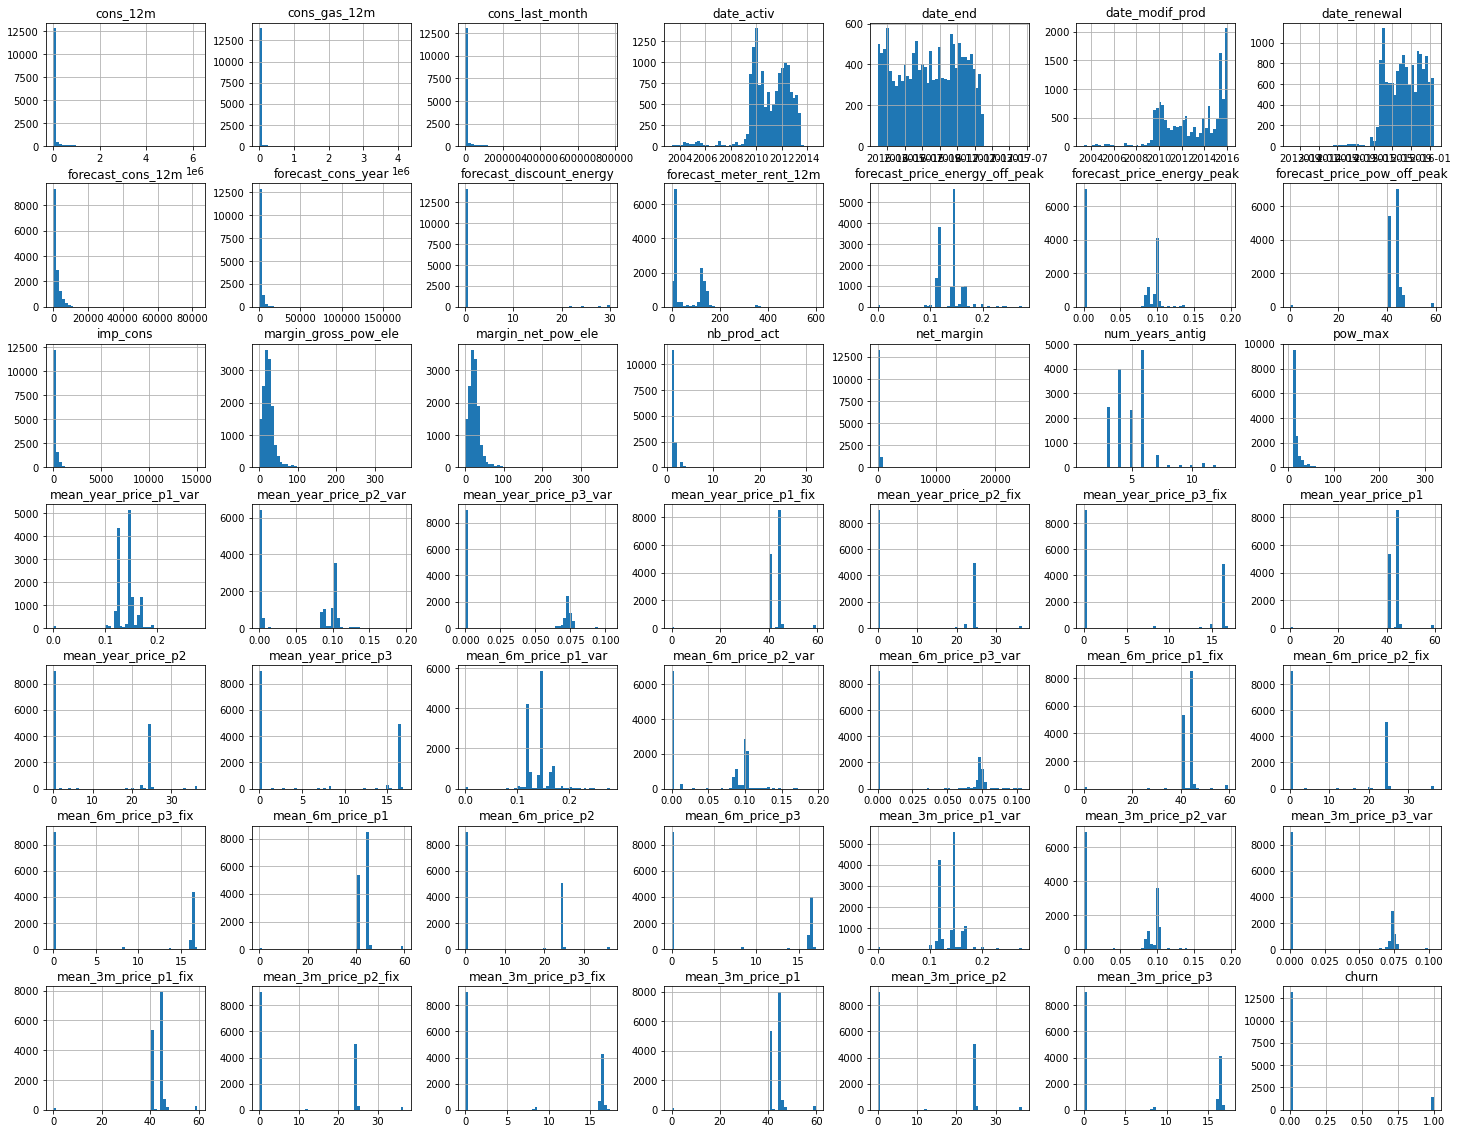

In [12]:
df.hist(figsize=(25,20),bins=50)
plt.show()

In [13]:
churn = df[['id','churn']]

In [14]:
diff_churn=pd.merge(diff,churn,on='id')
diff_churn.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  00114d74e963e47177db89bc70108537                        -0.003994   
4  0013f326a839a2f6ad87a1859952d227                        -0.006171   

   offpeak_diff_dec_january_power  churn  
0                        0.162916      0  
1                        0.177779      0  
2                        1.500000      0  
3                       -0.000001      0  
4                        0.000000      0

In [15]:
correlation = diff_churn.corr()

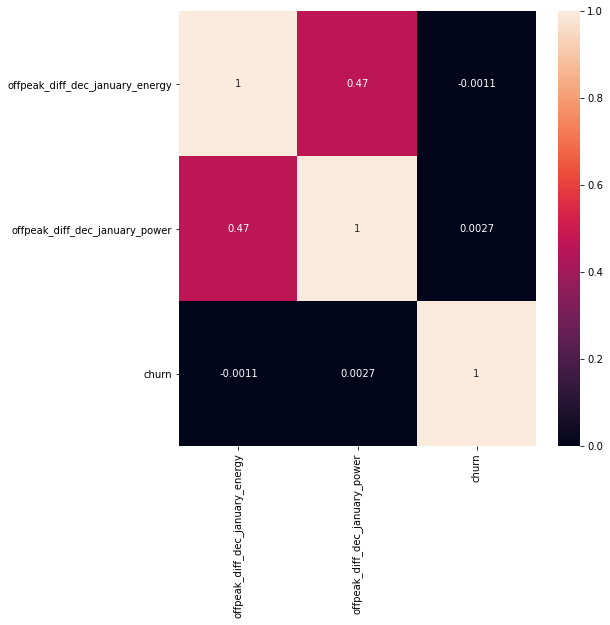

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot = True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

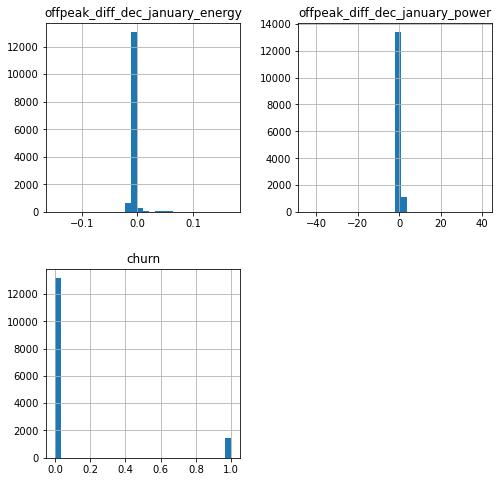

In [17]:
diff_churn.hist(figsize=(8,8),bins=30)
plt.show()

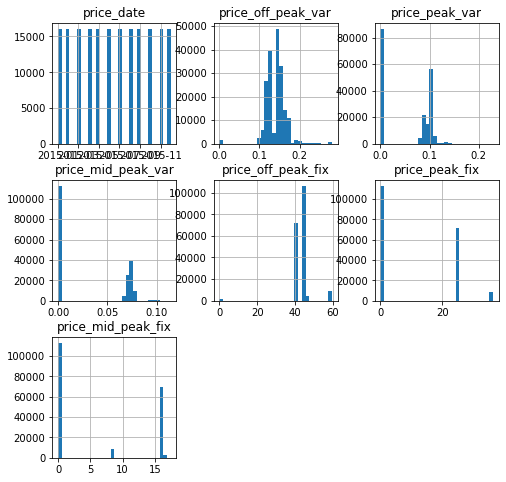

In [18]:
price_df.hist(figsize=(8,8),bins=30)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.ensemble import RandomForestClassifier
select = RandomForestClassifier(n_estimators=1000, random_state=42)

In [35]:
#to compare prediction model's accuracy score using cross-validation
from sklearn.model_selection import cross_val_score

In [39]:
#comparing other baseline classification models 
from xgboost import XGBClassifier

In [40]:
xgbc = XGBClassifier() 

In [42]:
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

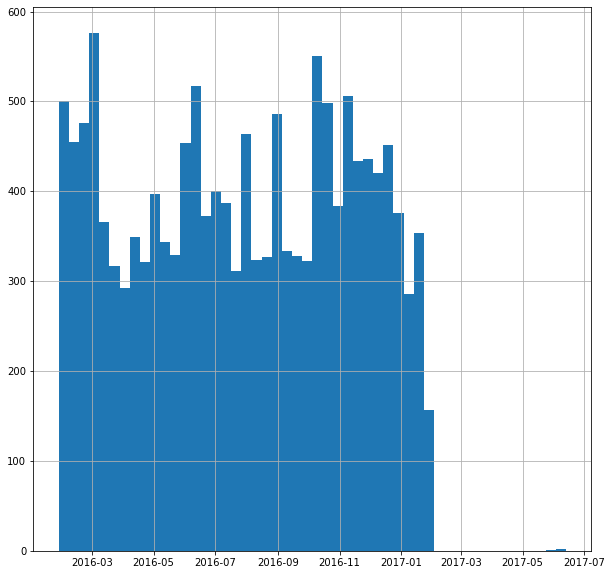

In [48]:
df['date_end'].hist(figsize=(10,10),bins=50)
plt.show()

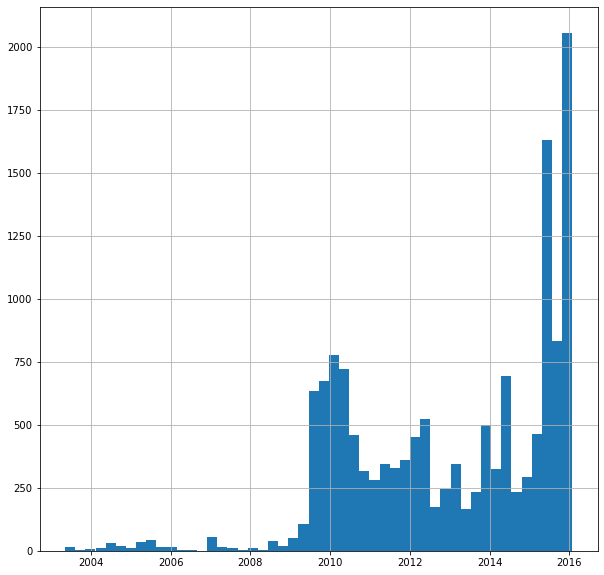

In [49]:
df['date_modif_prod'].hist(figsize=(10,10),bins=50)
plt.show()

# Difference in prices for consecutive periods

The features used should be improved for the model to predict a reliable outcome.

The plots above display the count of the change in product and end of product. It is evident that the count for end in

In [50]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [51]:
mean_price = price_df.groupby(['id','price_date']).agg({'price_off_peak_var':'mean','price_peak_var':'mean','price_mid_peak_var':'mean','price_off_peak_fix':'mean','price_peak_fix':'mean','price_mid_peak_fix':'mean'}).reset_index()

In [52]:
mean_price.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.103975            0.070232           40.565969       24.339581   
2        0.105842            0.073773           40.728885       24.437330   
3        0.105842            0.073773           40.728885       24.437330   
4        0.105842            0.073773           40.728885       24.437330   

   price_mid_peak_fix  
0           16.226389  
1           16.226389  
2           16.291555  
3           16.291555  
4           16.291555

In [53]:
mean_price.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [54]:
#to calculate the difference between the mean of consecutive months
mean_price['off_peak_peak_var_diff']= mean_price['price_off_peak_var']-mean_price['price_peak_var']
mean_price['peak_mid_peak_var_diff']= mean_price['price_peak_var']-mean_price['price_mid_peak_var']
mean_price['off_peak_mid_peak_var_diff']= mean_price['price_off_peak_var']-mean_price['price_mid_peak_var']
mean_price['off_peak_peak_fix_diff']= mean_price['price_off_peak_fix']-mean_price['price_peak_fix']
mean_price['peak_mid_peak_fix_diff']= mean_price['price_peak_fix']-mean_price['price_mid_peak_fix']
mean_price['off_peak_mid_peak_fix']= mean_price['price_off_peak_fix']-mean_price['price_mid_peak_fix']

In [55]:
mean_price.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.103975            0.070232           40.565969       24.339581   
2        0.105842            0.073773           40.728885       24.437330   
3        0.105842            0.073773           40.728885       24.437330   
4        0.105842            0.073773           40.728885       24.437330   

   price_mid_peak_fix  off_peak_peak_var_diff  peak_mid_peak_var_diff  \
0           16.226389                0.022123                0.033743   
1           16.226389                0.022123                0.033743   
2           16.291555                0.022225                0.032069   
3           16.291555                0.022225                0.032069   
4           16.291555                0.022225                0.032069   

   off_peak_mid_peak_var_diff  off_peak_peak_fix_diff  peak_mid_peak_fix_diff  \
0                    0.055866               16.226389                8.113192   
1                    0.055866               16.226389                8.113192   
2                    0.054294               16.291555                8.145775   
3                    0.054294               16.291555                8.145775   
4                    0.054294               16.291555                8.145775   

   off_peak_mid_peak_fix  
0              24.339581  
1              24.339581  
2              24.437330  
3              24.437330  
4              24.437330

In [56]:
#to find the max difference in price for each month

max_diff_across_periods_months = mean_price.groupby(['id']).agg({
    'off_peak_peak_var_diff':'max',
    'peak_mid_peak_var_diff':'max',
    'off_peak_mid_peak_var_diff':'max',
    'off_peak_peak_fix_diff':'max',
    'peak_mid_peak_fix_diff':'max',
    'off_peak_mid_peak_fix':'max'
    
}).reset_index().rename(columns={
     'off_peak_peak_var_diff':'off_peak_peak_var_max_diff',
    'peak_mid_peak_var_diff':'peak_mid_peak_var_max_diff',
    'off_peak_mid_peak_var_diff':'off_peak_mid_peak_var_max_diff',
    'off_peak_peak_fix_diff':'off_peak_peak_fix_max_diff',
    'peak_mid_peak_fix_diff':'peak_mid_peak_fix_max_diff',
    'off_peak_mid_peak_fix':'off_peak_mid_peak_max_fix'
})

In [57]:
max_diff_across_periods_months.head()

id  off_peak_peak_var_max_diff  \
0  0002203ffbb812588b632b9e628cc38d                    0.022225   
1  0004351ebdd665e6ee664792efc4fd13                    0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                    0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                    0.022581   
4  00114d74e963e47177db89bc70108537                    0.149902   

   peak_mid_peak_var_max_diff  off_peak_mid_peak_var_max_diff  \
0                    0.033743                        0.055866   
1                    0.000000                        0.148405   
2                    0.000000                        0.205742   
3                    0.031859                        0.054440   
4                    0.000000                        0.149902   

   off_peak_peak_fix_max_diff  peak_mid_peak_fix_max_diff  \
0                   16.291555                    8.145775   
1                   44.444710                    0.000000   
2                   45.944710                    0.000000   
3                   16.291555                    8.145775   
4                   44.266931                    0.000000   

   off_peak_mid_peak_max_fix  
0                  24.437330  
1                  44.444710  
2                  45.944710  
3                  24.437330  
4                  44.266931

In [58]:
columns=['id',
        'off_peak_peak_var_max_diff',
        'peak_mid_peak_var_max_diff',
        'off_peak_mid_peak_var_max_diff',
        'off_peak_peak_fix_max_diff',
        'peak_mid_peak_fix_max_diff',
        'off_peak_mid_peak_max_fix']
df= pd.merge(df,max_diff_across_periods_months[columns],on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1  \
0      2015-11-01   2015-06-23               0.00  ...         42.629663   
1      2009-08-21   2015-08-31             189.95  ...         44.592310   
2      2010-04-16   2015-04-17              47.96  ...         44.612508   
3      2010-03-30   2015-03-31             240.04  ...         44.593296   
4      2010-01-13   2015-03-09             445.75  ...         40.848791   

   mean_3m_price_p2  mean_3m_price_p3  churn  off_peak_peak_var_max_diff  \
0         12.311304          8.182687      1                    0.060550   
1          0.000000          0.000000      0                    0.151367   
2          0.088409          0.000000      0                    0.084587   
3          0.000000          0.000000      0                    0.153133   
4         24.539003         16.365274      0                    0.022225   

   peak_mid_peak_var_max_diff off_peak_mid_peak_var_max_diff  \
0                    0.085483                       0.146033   
1                    0.085483                       0.151367   
2                    0.089162                       0.172468   
3                    0.000000                       0.153133   
4                    0.033743                       0.055866   

   off_peak_peak_fix_max_diff  peak_mid_peak_fix_max_diff  \
0                   44.266930                    8.145775   
1                   44.444710                    0.000000   
2                   44.444710                    0.000000   
3                   44.444710                    0.000000   
4                   16.291555                    8.145775   

   off_peak_mid_peak_max_fix  
0                   44.26693  
1                   44.44471  
2                   44.44471  
3                   44.44471  
4                   24.43733  

[5 rows x 59 columns]

In [59]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mea

# EDA to model the features 

From the previous attempt at modelling the features above, it is imperative that the features needed are more specific than just a vague dataframe of difference in prices. 

In [60]:
#To calculate the tenure by using timedelta
from datetime import timedelta
df['tenure']=(df['date_end']-df['date_activ'])

In [61]:
df['tenure']=(df['tenure']/np.timedelta64(1,'Y')).astype('int')
df['tenure']

0        3
1        7
2        6
3        6
4        6
        ..
14600    3
14601    4
14602    3
14603    4
14604    6
Name: tenure, Length: 14605, dtype: int32

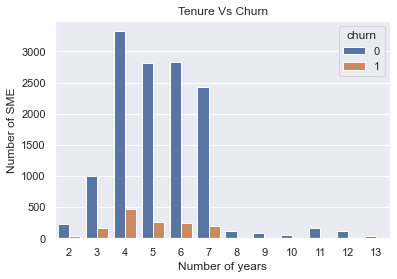

In [62]:
#visualise churn vs tenure
sns.set()
plt.figure()
ax= sns.countplot(x=df['tenure'],hue=df['churn'])
ax.set_title('Tenure Vs Churn')
ax.set_ylabel('Number of SME')
ax.set_xlabel('Number of years')
plt.show()

As mentioned earlier during the exploratory data analysis, the plot shows that the highest number of customers who've churned have had a tenure of 5 years or less. The number of clients with 2 years tenure is relatively lesser perhaps due to obvious reasons, i.e, because they're new to the company and their policies, hence, testing the waters. Customers with a tenure more than 7 years display no attrition, this could also be due to the loyalty and familiarity with the company and its history. 

This evidence could be one of the factors to decide the customers who could possibly receive discounts to retain.

In [63]:
#Number of months left to renew contract
# Jan 2016 is used as the reference date since the customers had churned during the beginning of 2016
from datetime import datetime
df['months_since_modif'] =  ((datetime(2016,1,1)-df['date_modif_prod'])/np.timedelta64(1,'M')).astype('int')
df['months_since_modif']

0         2
1        76
2        68
3        69
4        71
         ..
14600     7
14601    40
14602    46
14603    40
14604    72
Name: months_since_modif, Length: 14605, dtype: int32

In [64]:
#to convert all dates to number of months for ease in modelling and prediction 
reference = datetime(2016,1,1)
df['months_active']= ((reference-df['date_activ'])/np.timedelta64(1,'M')).astype('int')
df['months_to_end']= -((reference-df['date_end'])/np.timedelta64(1,'M')).astype('int')

In [65]:
df['months_to_end']

0         5
1         7
2         3
3         2
4         2
         ..
14600     4
14601     7
14602     1
14603     7
14604    11
Name: months_to_end, Length: 14605, dtype: int32

In [66]:
df['months_since_renew']=((reference-df['date_renewal'])/np.timedelta64(1,'M')).astype('int')

In [67]:
#drop the date columns since it is not necessary for further analysis
df = df.drop(columns=[
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
])

In [68]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_diff  \
0                        0.114481  ...                    0.085483   
1                        0.145711  ...                    0.085483   
2                        0.165794  ...                    0.089162   
3                        0.146694  ...                    0.000000   
4                        0.116900  ...                    0.033743   

   off_peak_mid_peak_var_max_diff off_peak_peak_fix_max_diff  \
0                        0.146033                  44.266930   
1                        0.151367                  44.444710   
2                        0.172468                  44.444710   
3                        0.153133                  44.444710   
4                        0.055866                  16.291555   

   peak_mid_peak_fix_max_diff  off_peak_mid_peak_max_fix  tenure  \
0                    8.145775                   44.26693       3   
1                    0.000000                   44.44471       7   
2                    0.000000                   44.44471       6   
3                    0.000000                   44.44471       6   
4                    8.145775                   24.43733       6   

   months_since_modif  months_active  months_to_end months_since_renew  
0                   2             30              5                  6  
1                  76             76              7                  4  
2                  68             68              3                  8  
3                  69             69              2                  9  
4                  71             71              2                  9  

[5 rows x 60 columns]

# Categorical data 

From EDA, we had visualised categorical data for churn possibilities, but hadn't asserted the category data type to the same. To calculate it's percentage again for the sake of modelling:

In [69]:
#Origin_up
df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [70]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [71]:
#channel
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [72]:
#to visualise churn 
#churned customer visualisation 
#to plot stacked bars
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """ To plot stacked bars for the number of companies or clients who 
    have churned """

    ax= dataframe.plot(
    kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
    
   

In [73]:
origin = df[['id','origin_up','churn']]
origin = origin.groupby([origin['origin_up'],origin['churn']])['id'].count().unstack(level=1).fillna(0)
origin_churn = (origin.div(origin.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)

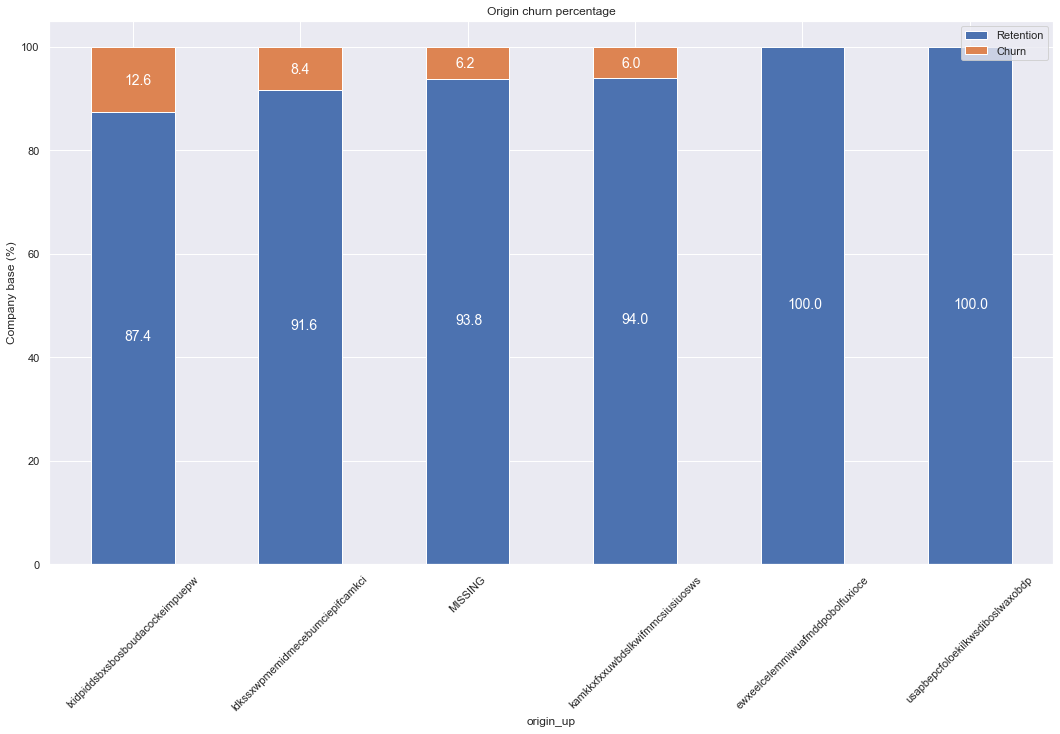

In [74]:
plot_stacked_bars(origin_churn,'Origin churn percentage',rot_=45)

If the value_counts() series for origin_up and this stacked plot is compared, it is seen that 2 out of these 6 categories have only 3 customers as a sum. This may not have any effect on the model, therefore, we could drop these columns to make it easier for the model to decide the dominating categories. 

In [75]:
channel = df[['id','channel_sales','churn']]
channel= channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)

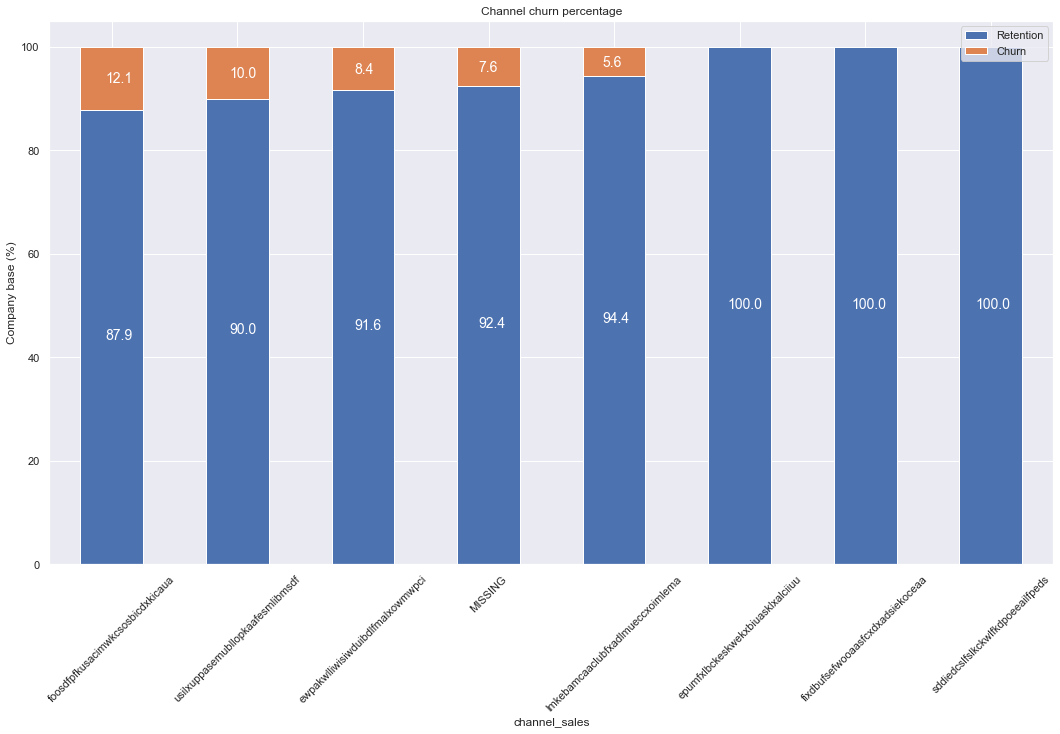

In [76]:
plot_stacked_bars(channel_churn,'Channel churn percentage',rot_=45)

Similarly, for channel sales and the number of customers belonging to 3 categories are infinitesimal if the entire dataset is considered collectively.

Categorical variables are created in a machine learning model for obvious reasons- classification. Here, we could use one-hot encoding to classify the channel sales 

In [77]:
df = pd.get_dummies(df,columns=['origin_up'],prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING','origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_fix_max_diff  \
0                        0.114481  ...                    8.145775   
1                        0.145711  ...                    0.000000   
2                        0.165794  ...                    0.000000   
3                        0.146694  ...                    0.000000   
4                        0.116900  ...                    8.145775   

   off_peak_mid_peak_max_fix tenure  months_since_modif  months_active  \
0                   44.26693      3                   2             30   
1                   44.44471      7                  76             76   
2                   44.44471      6                  68             68   
3                   44.44471      6                  69             69   
4                   24.43733      6                  71             71   

   months_to_end  months_since_renew  \
0              5                   6   
1              7                   4   
2              3                   8   
3              2                   9   
4              2                   9   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 62 columns]

In [78]:
df = pd.get_dummies(df,columns=['channel_sales'],prefix='channel_sales')
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds','channel_sales_epumfxlbckeskwekxbiuasklxalciiuu','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_to_end months_since_renew  \
0                    0.098142  ...              5                  6   
1                    0.000000  ...              7                  4   
2                    0.087899  ...              3                  8   
3                    0.000000  ...              2                  9   
4                    0.100015  ...              2                  9   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  channel_sales_MISSING  \
0                                           1                      0   
1                                           0                      1   
2                                           0                      0   
3                                           0                      0   
4                                           0                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  
0                                               0  
1                                               0  
2                                               0  
3                                               0  
4                                               0  

[5 rows x 66 columns]

In [79]:
df.describe()


cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  months_to_end  months_since_renew  \
count                 14605.000000  ...   14605.000000        14605.000000   
mean                     43.130085  ...       6.393153            4.910305   
std                       4.486140  ...       3.512845            3.795950   
min                       0.000000  ...       0.000000            0.000000   
25%                      40.606701  ...       3.000000            2.000000   
50%                      44.311378  ...       6.000000            5.000000   
75%                      44.311378  ...       9.000000            8.000000   
max                      59.266378  ...      17.000000           30.000000   

       origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
count                                14605.000000   
mean                                     0.294009   
std                                      0.455612   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       origin_up_ldkssxwpmemidmecebumciepifcamkci  \
count                                14605.000000   
mean                                     0.215543   
std                                      0.411212   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       origin_up_lxidpiddsbxsbosboudacockeimpuepw  channel_sales_MISSING  \
count                                14605.000000           14605.000000   
mean                                     0.485861               0.255050   
std                                      0.499817               0.435904   
min                                      0.0000

The standard deviation and IQE are in exponential values. It could be transformed to logarithmic values or square roots for ease in prediction. However, 'logarithmic transformation can be used for "positively skewed" distribution'.

# Skewness of data

The standard deviation is of more significance in this specific analysis because it is of prime importance for Kernel density estimate. Hence, the following transformation.

In [80]:
#Using numpy's log10 method
df["cons_12m"] = np.log10(df["cons_12m"]+1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)


In [81]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

In [82]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cons_12m', ylabel='Density'>

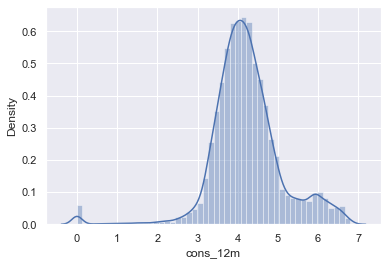

In [83]:
#plotting distplot for consumption and forecast
sns.distplot(df['cons_12m'])

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='forecast_cons_12m', ylabel='Density'>

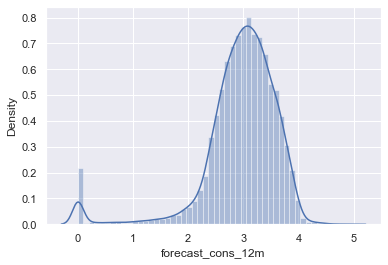

In [84]:
sns.distplot(df['forecast_cons_12m'])

# Correlation 

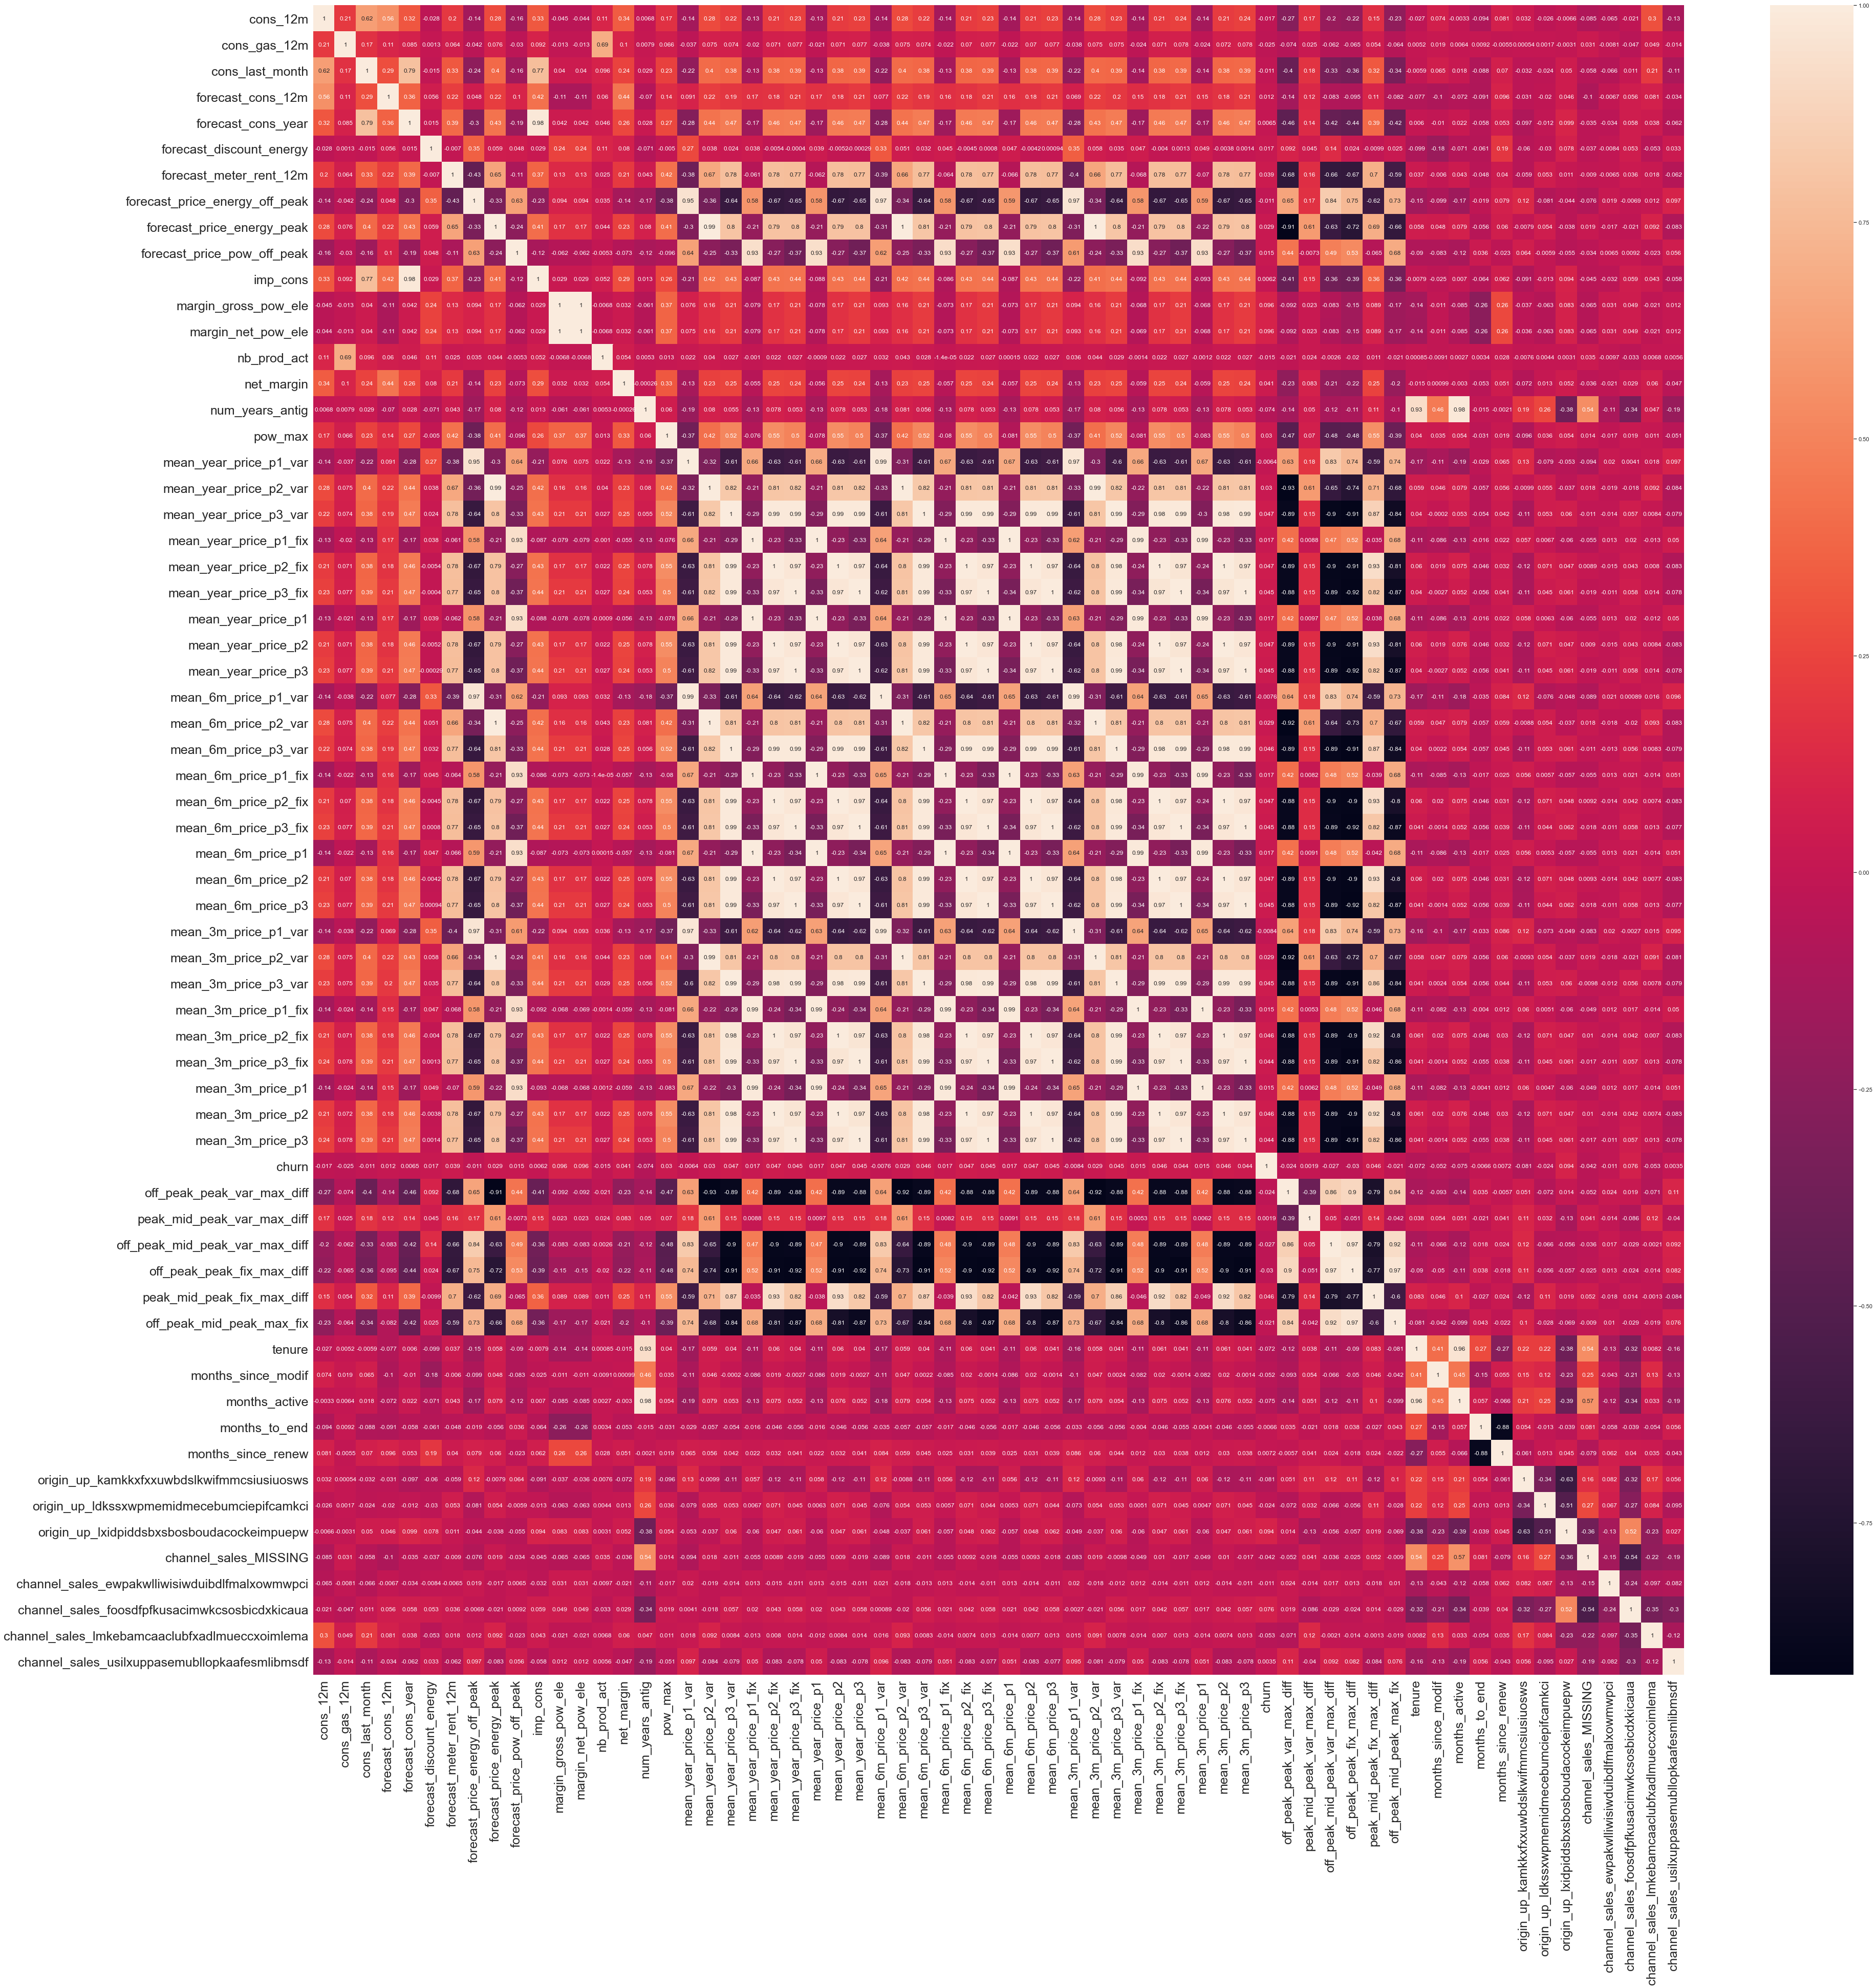

In [85]:
correlation_fe = df.corr()
plt.figure(figsize=(60,60))
sns.heatmap(correlation_fe,xticklabels=correlation_fe.columns.values, yticklabels=correlation_fe.columns.values, annot = True,annot_kws={'size':'12'})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [86]:
#To find positive or negative correlation
corr_pos_beg = df.drop(columns=['id','churn'])
correlations = corr_pos_beg.corrwith(df.churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 margin_net_pow_ele                                0.095780
margin_gross_pow_ele                              0.095733
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.094158
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.075991
mean_year_price_p2_fix                            0.047224
mean_year_price_p2                                0.047188
mean_6m_price_p2_fix                              0.047067
mean_6m_price_p2                                  0.047030
mean_year_price_p3_var                            0.046528
mean_6m_price_p3_var                              0.046225
peak_mid_peak_fix_max_diff                        0.045780
mean_3m_price_p2_fix                              0.045755
mean_3m_price_p2                                  0.045724
mean_3m_price_p3_var                              0.045218
mean_year_price_p3                                0.044835
mean_year_price_p3_fix                            0.044825
mean_6m_price_p3          

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

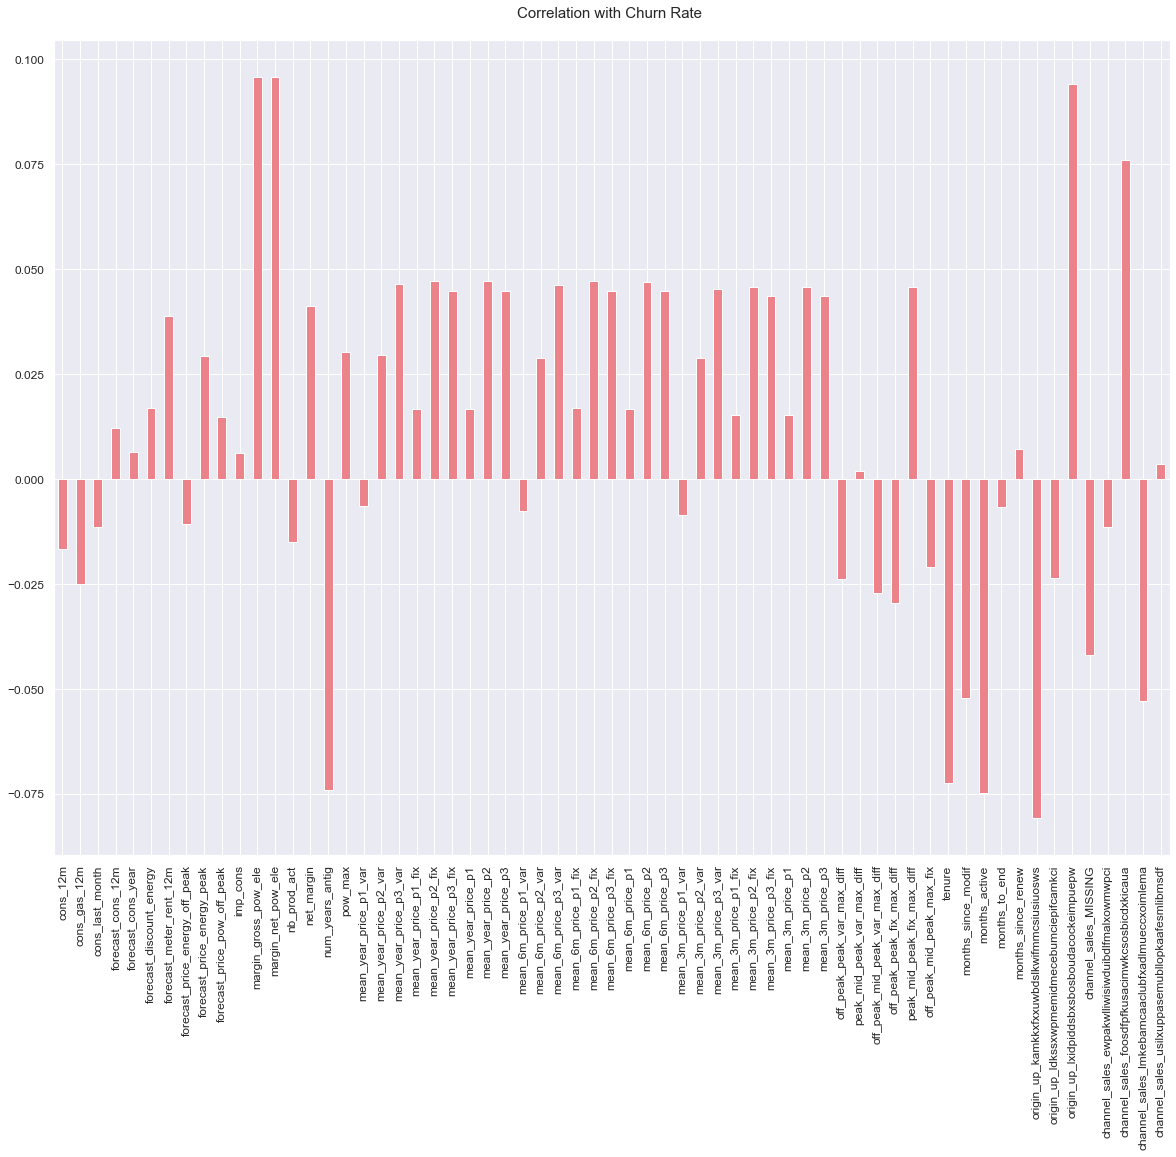

In [87]:
#plotting the correlation
correlations.plot.bar(figsize= (20,15),fontsize = 12, color = '#ec838a',
        rot = 90, grid = True)
plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "15", fontfamily = "sans-serif")

<AxesSubplot:>

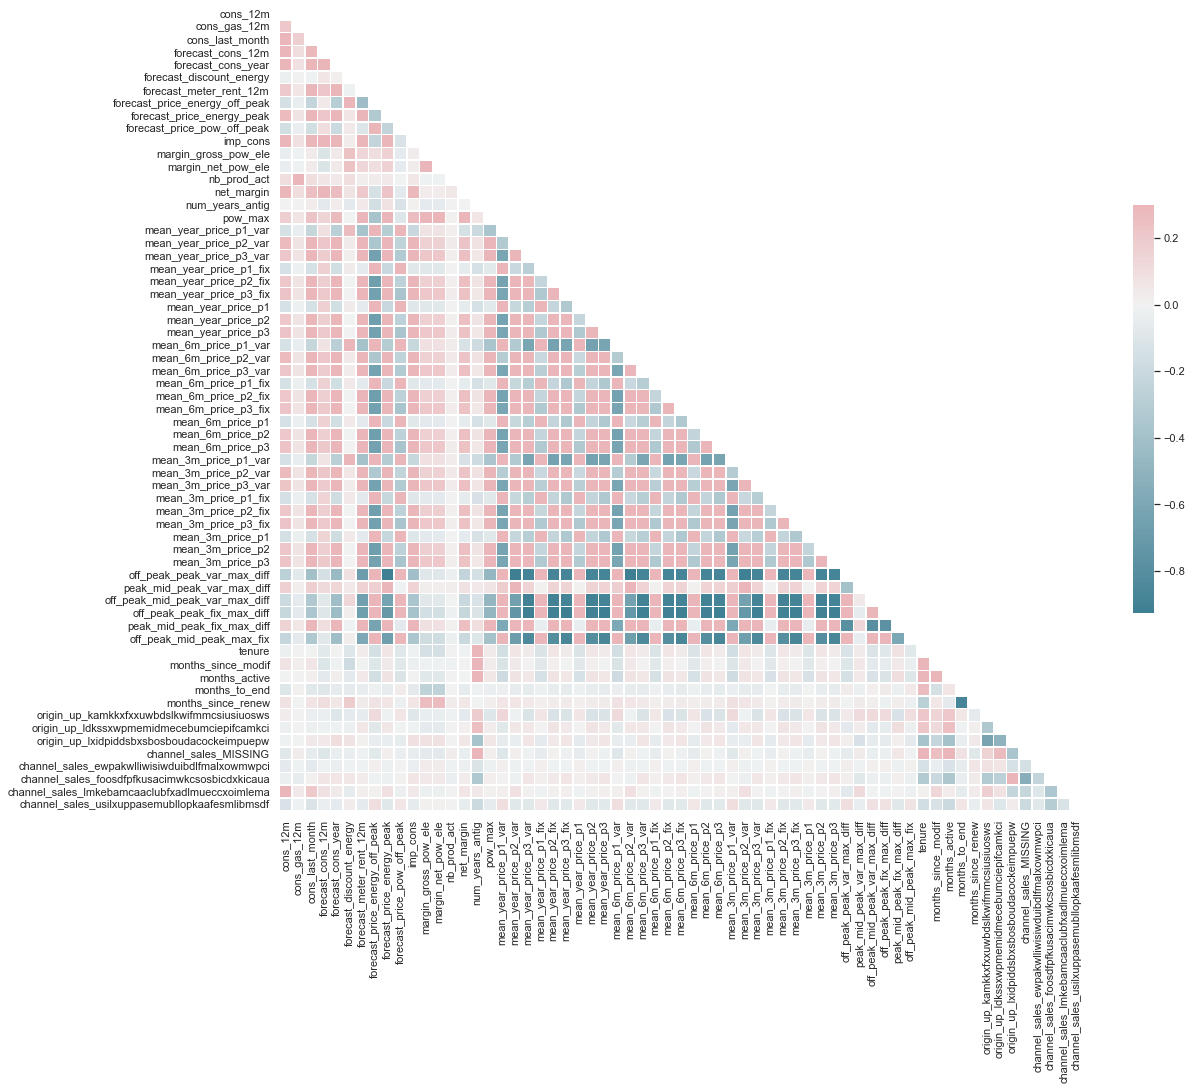

In [88]:
#Another heatmap 
sns.set(style='white')
corr = corr_pos_beg.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation amidst price sensitivities and churn is bleak. 

In [89]:
df.dtypes

id                                                 object
cons_12m                                          float64
cons_gas_12m                                      float64
cons_last_month                                   float64
forecast_cons_12m                                 float64
                                                   ...   
channel_sales_MISSING                               uint8
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci      uint8
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua      uint8
channel_sales_lmkebamcaaclubfxadlmueccxoimlema      uint8
channel_sales_usilxuppasemubllopkaafesmlibmsdf      uint8
Length: 66, dtype: object

In [91]:
#to calculate variance inflation factor
vif_data = df[['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix',
       'mean_3m_price_p3_fix', 'mean_3m_price_p1', 'mean_3m_price_p2',
       'mean_3m_price_p3', 'off_peak_peak_var_max_diff',
       'peak_mid_peak_var_max_diff', 'off_peak_mid_peak_var_max_diff',
       'off_peak_peak_fix_max_diff', 'peak_mid_peak_fix_max_diff',
       'off_peak_mid_peak_max_fix', 'tenure', 'months_since_modif',
       'months_active', 'months_to_end', 'months_since_renew',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw', 'channel_sales_MISSING',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf']]

In [92]:
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 64 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14605 non-null  float64
 1   cons_gas_12m                                    14605 non-null  float64
 2   cons_last_month                                 14605 non-null  float64
 3   forecast_cons_12m                               14605 non-null  float64
 4   forecast_cons_year                              14605 non-null  float64
 5   forecast_discount_energy                        14605 non-null  float64
 6   forecast_meter_rent_12m                         14605 non-null  float64
 7   forecast_price_energy_off_peak                  14605 non-null  float64
 8   forecast_price_energy_peak                      14605 non-null  float64
 9   forecast_price_pow_off_peak            

In [93]:
gas = {'t':1,'f':0}
vif_data['has_gas']= vif_data['has_gas'].map(gas)

<ipython-input-93-00d6a0c4ffb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data['has_gas']= vif_data['has_gas'].map(gas)


In [94]:
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 64 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14605 non-null  float64
 1   cons_gas_12m                                    14605 non-null  float64
 2   cons_last_month                                 14605 non-null  float64
 3   forecast_cons_12m                               14605 non-null  float64
 4   forecast_cons_year                              14605 non-null  float64
 5   forecast_discount_energy                        14605 non-null  float64
 6   forecast_meter_rent_12m                         14605 non-null  float64
 7   forecast_price_energy_off_peak                  14605 non-null  float64
 8   forecast_price_energy_peak                      14605 non-null  float64
 9   forecast_price_pow_off_peak            

In [95]:
vif_data.isnull().sum()

cons_12m                                          0
cons_gas_12m                                      0
cons_last_month                                   0
forecast_cons_12m                                 0
forecast_cons_year                                0
                                                 ..
channel_sales_MISSING                             0
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci    0
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0
channel_sales_lmkebamcaaclubfxadlmueccxoimlema    0
channel_sales_usilxuppasemubllopkaafesmlibmsdf    0
Length: 64, dtype: int64

In [97]:
# To check multicollinearity 
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
vif_table = calc_vif(vif_data)

C:\Users\NAMEERA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [98]:
vif_table[vif_table['VIF']>=14000]

variables           VIF
12        margin_gross_pow_ele  1.450003e+04
13          margin_net_pow_ele  1.449144e+04
18      mean_year_price_p1_var           inf
19      mean_year_price_p2_var           inf
20      mean_year_price_p3_var           inf
21      mean_year_price_p1_fix           inf
22      mean_year_price_p2_fix           inf
23      mean_year_price_p3_fix           inf
24          mean_year_price_p1           inf
25          mean_year_price_p2           inf
26          mean_year_price_p3           inf
27        mean_6m_price_p1_var           inf
28        mean_6m_price_p2_var           inf
29        mean_6m_price_p3_var           inf
30        mean_6m_price_p1_fix           inf
31        mean_6m_price_p2_fix           inf
32        mean_6m_price_p3_fix           inf
33            mean_6m_price_p1           inf
34            mean_6m_price_p2           inf
35            mean_6m_price_p3           inf
36        mean_3m_price_p1_var           inf
37        mean_3m_price_p2_var           inf
38        mean_3m_price_p3_var           inf
39        mean_3m_price_p1_fix           inf
40        mean_3m_price_p2_fix           inf
41        mean_3m_price_p3_fix           inf
42            mean_3m_price_p1           inf
43            mean_3m_price_p2           inf
44            mean_3m_price_p3           inf
48  off_peak_peak_fix_max_diff  1.505741e+04
50   off_peak_mid_peak_max_fix  2.748723e+04

In [99]:
vif_table

variables         VIF
0                                         cons_12m   89.194204
1                                     cons_gas_12m   11.107624
2                                  cons_last_month   15.710530
3                                forecast_cons_12m   64.927899
4                               forecast_cons_year  113.119905
..                                             ...         ...
59                           channel_sales_MISSING   95.865510
60  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci   22.854420
61  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  170.189480
62  channel_sales_lmkebamcaaclubfxadlmueccxoimlema   47.914701
63  channel_sales_usilxuppasemubllopkaafesmlibmsdf   34.948853

[64 rows x 2 columns]

In [100]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_

The infinite values for VIF is due to the following: 
- If it shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.
- multicollinearity can also occur when you use dummy variables to handle discrete independent variables and if you are not careful and include the default values as well.

In [101]:
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 64 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14605 non-null  float64
 1   cons_gas_12m                                    14605 non-null  float64
 2   cons_last_month                                 14605 non-null  float64
 3   forecast_cons_12m                               14605 non-null  float64
 4   forecast_cons_year                              14605 non-null  float64
 5   forecast_discount_energy                        14605 non-null  float64
 6   forecast_meter_rent_12m                         14605 non-null  float64
 7   forecast_price_energy_off_peak                  14605 non-null  float64
 8   forecast_price_energy_peak                      14605 non-null  float64
 9   forecast_price_pow_off_peak            

In [102]:
#dropping varibles with infinite values
calc_vif(vif_data)

C:\Users\NAMEERA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables         VIF
0                                         cons_12m   89.194204
1                                     cons_gas_12m   11.107624
2                                  cons_last_month   15.710530
3                                forecast_cons_12m   64.927899
4                               forecast_cons_year  113.119905
..                                             ...         ...
59                           channel_sales_MISSING   95.865510
60  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci   22.854420
61  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  170.189480
62  channel_sales_lmkebamcaaclubfxadlmueccxoimlema   47.914701
63  channel_sales_usilxuppasemubllopkaafesmlibmsdf   34.948853

[64 rows x 2 columns]

In [103]:
vif_data = vif_data.drop(['mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix'],axis=1)
calc_vif(vif_data)

C:\Users\NAMEERA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables           VIF
0                                         cons_12m  8.913624e+01
1                                     cons_gas_12m  1.110705e+01
2                                  cons_last_month  1.570658e+01
3                                forecast_cons_12m  6.489612e+01
4                               forecast_cons_year  1.128358e+02
5                         forecast_discount_energy  2.816080e+00
6                          forecast_meter_rent_12m  2.271491e+01
7                   forecast_price_energy_off_peak  2.316566e+03
8                       forecast_price_energy_peak  4.599435e+02
9                      forecast_price_pow_off_peak  2.857975e+03
10                                         has_gas  1.236076e+01
11                                        imp_cons  1.057956e+02
12                            margin_gross_pow_ele  1.449956e+04
13                              margin_net_pow_ele  1.449058e+04
14                                     nb_prod_act  9.549018e+00
15                                      net_margin  2.764145e+00
16                                 num_years_antig  4.305646e+02
17                                         pow_max  5.844711e+00
18                          mean_year_price_p1_var  5.761929e+03
19                              mean_year_price_p1  3.249307e+04
20                              mean_year_price_p2  2.511237e+05
21                              mean_year_price_p3  2.252561e+05
22                            mean_6m_price_p1_var           inf
23                            mean_6m_price_p2_var           inf
24                            mean_6m_price_p3_var           inf
25                            mean_6m_price_p1_fix           inf
26                            mean_6m_price_p2_fix           inf
27                            mean_6m_price_p3_fix           inf
28                                mean_6m_price_p1           inf
29                                mean_6m_price_p2           inf
30                                mean_6m_price_p3           inf
31                            mean_3m_price_p1_var           inf
32                            mean_3m_price_p2_var           inf
33                            mean_3m_price_p3_var           inf
34                            mean_3m_price_p1_fix           inf
35                            mean_3m_price_p2_fix           inf
36                            mean_3m_price_p3_fix           inf
37                                mean_3m_price_p1           inf
38                                mean_3m_price_p2           inf
39                                mean_3m_price_p3           inf
40                      off_peak_peak_var_max_diff  1.262014e+03
41                      peak_mid_peak_var_max_diff  8.765893e+00
42                  off_peak_mid_peak_var_max_diff  2.129442e+03
43                      off_peak_peak_fix_max_diff  1.491981e+04
44                      peak_mid_peak_fix_max_diff  4.564491e+02
45                       off_peak_mid_peak_max_fix  2.730667e+04
46                                          tenure  3.249107e+02
47                              months_since_modif  3.547696e+00
48                                   months_active  6.351389e+02
49                                   months_to_end  2.688251e+01
50                              months_since_renew  1.550161e+01
51      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  5.645350e+01
52      origin_up_ldkssxwpmemidmecebumciepifcamkci  4.130212e+01
53      origin_up_lxidpiddsbxsbosboudacockeimpuepw  9.167179e+01
54                           channel_sales_MISSING  9.578335e+01
55  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  2.283705e+01
56  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  1.700377e+02
57  channel_sales_lmkebamcaaclubfxadlmueccxoimlema  4.788216e+01
58  channel_sales_usilxuppasemubllopkaafesmlibmsdf  3.491995e+01

In [104]:
vif_data = vif_data.drop(columns='mean_year_price_p1_var')
calc_vif(vif_data)


C:\Users\NAMEERA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables           VIF
0                                         cons_12m  8.913533e+01
1                                     cons_gas_12m  1.110693e+01
2                                  cons_last_month  1.570403e+01
3                                forecast_cons_12m  6.476025e+01
4                               forecast_cons_year  1.127916e+02
5                         forecast_discount_energy  2.778170e+00
6                          forecast_meter_rent_12m  2.271374e+01
7                   forecast_price_energy_off_peak  2.305922e+03
8                       forecast_price_energy_peak  4.598557e+02
9                      forecast_price_pow_off_peak  2.845023e+03
10                                         has_gas  1.235512e+01
11                                        imp_cons  1.057728e+02
12                            margin_gross_pow_ele  1.449824e+04
13                              margin_net_pow_ele  1.448968e+04
14                                     nb_prod_act  9.516404e+00
15                                      net_margin  2.756885e+00
16                                 num_years_antig  4.283492e+02
17                                         pow_max  5.818500e+00
18                              mean_year_price_p1  2.316700e+04
19                              mean_year_price_p2  2.501348e+05
20                              mean_year_price_p3  2.245746e+05
21                            mean_6m_price_p1_var           inf
22                            mean_6m_price_p2_var           inf
23                            mean_6m_price_p3_var           inf
24                            mean_6m_price_p1_fix           inf
25                            mean_6m_price_p2_fix           inf
26                            mean_6m_price_p3_fix           inf
27                                mean_6m_price_p1           inf
28                                mean_6m_price_p2           inf
29                                mean_6m_price_p3           inf
30                            mean_3m_price_p1_var           inf
31                            mean_3m_price_p2_var           inf
32                            mean_3m_price_p3_var           inf
33                            mean_3m_price_p1_fix           inf
34                            mean_3m_price_p2_fix           inf
35                            mean_3m_price_p3_fix           inf
36                                mean_3m_price_p1           inf
37                                mean_3m_price_p2           inf
38                                mean_3m_price_p3           inf
39                      off_peak_peak_var_max_diff  1.259062e+03
40                      peak_mid_peak_var_max_diff  8.709169e+00
41                  off_peak_mid_peak_var_max_diff  1.947478e+03
42                      off_peak_peak_fix_max_diff  1.458909e+04
43                      peak_mid_peak_fix_max_diff  4.564475e+02
44                       off_peak_mid_peak_max_fix  2.725303e+04
45                                          tenure  3.247105e+02
46                              months_since_modif  3.547673e+00
47                                   months_active  6.342590e+02
48                                   months_to_end  2.645418e+01
49                              months_since_renew  1.512100e+01
50      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  5.644588e+01
51      origin_up_ldkssxwpmemidmecebumciepifcamkci  4.129499e+01
52      origin_up_lxidpiddsbxsbosboudacockeimpuepw  9.165862e+01
53                           channel_sales_MISSING  9.573230e+01
54  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  2.282951e+01
55  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  1.699282e+02
56  channel_sales_lmkebamcaaclubfxadlmueccxoimlema  4.785822e+01
57  channel_sales_usilxuppasemubllopkaafesmlibmsdf  3.489617e+01

In [105]:
vif_data = vif_data.drop(['mean_year_price_p1',
       'mean_year_price_p2', 'mean_year_price_p3', 'mean_6m_price_p1_var',
       'mean_6m_price_p2_var', 'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3', 'mean_3m_price_p1_var',
       'mean_3m_price_p2_var', 'mean_3m_price_p3_var', 'mean_3m_price_p1_fix',
       'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix', 'mean_3m_price_p1',
       'mean_3m_price_p2', 'mean_3m_price_p3'],axis=1)
calc_vif(vif_data)

variables           VIF
0                                         cons_12m     87.784066
1                                     cons_gas_12m     11.092147
2                                  cons_last_month     15.555417
3                                forecast_cons_12m     59.580875
4                               forecast_cons_year    108.503541
5                         forecast_discount_energy      2.406914
6                          forecast_meter_rent_12m     21.052951
7                   forecast_price_energy_off_peak    877.000812
8                       forecast_price_energy_peak    113.021431
9                      forecast_price_pow_off_peak   1260.082973
10                                         has_gas     12.345794
11                                        imp_cons    102.690966
12                            margin_gross_pow_ele  14484.533692
13                              margin_net_pow_ele  14475.938518
14                                     nb_prod_act      9.504124
15                                      net_margin      1.975014
16                                 num_years_antig    422.342534
17                                         pow_max      5.718032
18                      off_peak_peak_var_max_diff    343.996930
19                      peak_mid_peak_var_max_diff      7.107993
20                  off_peak_mid_peak_var_max_diff    603.343568
21                      off_peak_peak_fix_max_diff   1362.859036
22                      peak_mid_peak_fix_max_diff     37.360996
23                       off_peak_mid_peak_max_fix   1819.452361
24                                          tenure    320.094692
25                              months_since_modif      3.498295
26                                   months_active    624.933655
27                                   months_to_end     25.000454
28                              months_since_renew     14.110728
29      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws     56.175597
30      origin_up_ldkssxwpmemidmecebumciepifcamkci     41.098595
31      origin_up_lxidpiddsbxsbosboudacockeimpuepw     91.310669
32                           channel_sales_MISSING     89.924820
33  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci     21.423273
34  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    158.696637
35  channel_sales_lmkebamcaaclubfxadlmueccxoimlema     44.833236
36  channel_sales_usilxuppasemubllopkaafesmlibmsdf     32.691306

By dropping the features that generated exorbitant values, the multicollinearity of the other variables has reduced. Although these are not reasonable, it captures the essence of the data set that cannot be compromised

In [106]:
vif_data.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'off_peak_peak_var_max_diff', 'peak_mid_peak_var_max_diff',
       'off_peak_mid_peak_var_max_diff', 'off_peak_peak_fix_max_diff',
       'peak_mid_peak_fix_max_diff', 'off_peak_mid_peak_max_fix', 'tenure',
       'months_since_modif', 'months_active', 'months_to_end',
       'months_since_renew', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw', 'channel_sales_MISSING',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_foosdfpfkusacimwkcsosbicdxki

In [107]:
df = df[['id','churn','cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'off_peak_peak_var_max_diff', 'peak_mid_peak_var_max_diff',
       'off_peak_mid_peak_var_max_diff', 'off_peak_peak_fix_max_diff',
       'peak_mid_peak_fix_max_diff', 'off_peak_mid_peak_max_fix', 'tenure',
       'months_since_modif', 'months_active', 'months_to_end',
       'months_since_renew', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw', 'channel_sales_MISSING',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf']]

# Modelling

In [109]:
identity_encode = df['id']
df = df.drop(columns = ['id'])

#convert the rest of the dataset into dummy variables
df= pd.get_dummies(df)

#rejoin id to dataset
df= pd.concat([df,identity_encode],axis=1)

In [110]:
#Split the dataset into dependent and independent variables 
X= df.drop(columns='churn')
y = df['churn']

In [111]:
#splitting the dataset using train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (11684, 39)
Number transactions y_train dataset:  (11684,)
Number transactions X_test dataset:  (2921, 39)
Number transactions y_test dataset:  (2921,)


In [112]:
#remove identifiers since these are string objects
train_identity_2 = X_train['id']
X_train = X_train.drop(columns = ['id'])
test_identity_2 = X_test['id']
X_test = X_test.drop(columns = ['id'])

In [113]:
#modelling 
select.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [115]:
from sklearn.metrics import fbeta_score
#prediction
prediction = select.predict(X_test)

#confusion matrix and scores
#RFC
ypred = prediction
model = select
#ravel() used for a flattenned contiguous array
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()

print ('Confusion Matrix:')

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
print("Fbeta_score:",fbeta_score(y_test, ypred, beta=2.0))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
True positives: 25
False positives: 3
True negatives: 2634
False negatives: 259


Accuracy: 0.9103046901745977
Overall Precision: 0.8928571428571429
Overall Recall: 0.0880281690140845
Overall f1-score: 0.16025641025641024
Fbeta_score: 0.10738831615120274


Although the accuracy of the model is about 91%, it is always not the metric we are sought after. The test set has a number of 2921 out of which the model has predicted True negatives (churn = 0) of 2634, that is a very good number. However, the false negatives are about 259; this shouldn't be the case (i.e) false negatives should be as close to 0 as possible, hence paving way for parameter tuning. Also pointing out the fact that the recall rate is very low, further proving the point. 

Overall, the precison of the model is at 89.2% which is a good number but could be improved. The point of concern is that the model predicts the customers who wouldn't churn with a higher precision than the customers who would (which is the point of interest here).
- precision increased by 3% in comparison to the contrary (Dropped columns after inspecting VIF)

# Feature importance 

In [115]:
#feature importance histogram
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': select.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


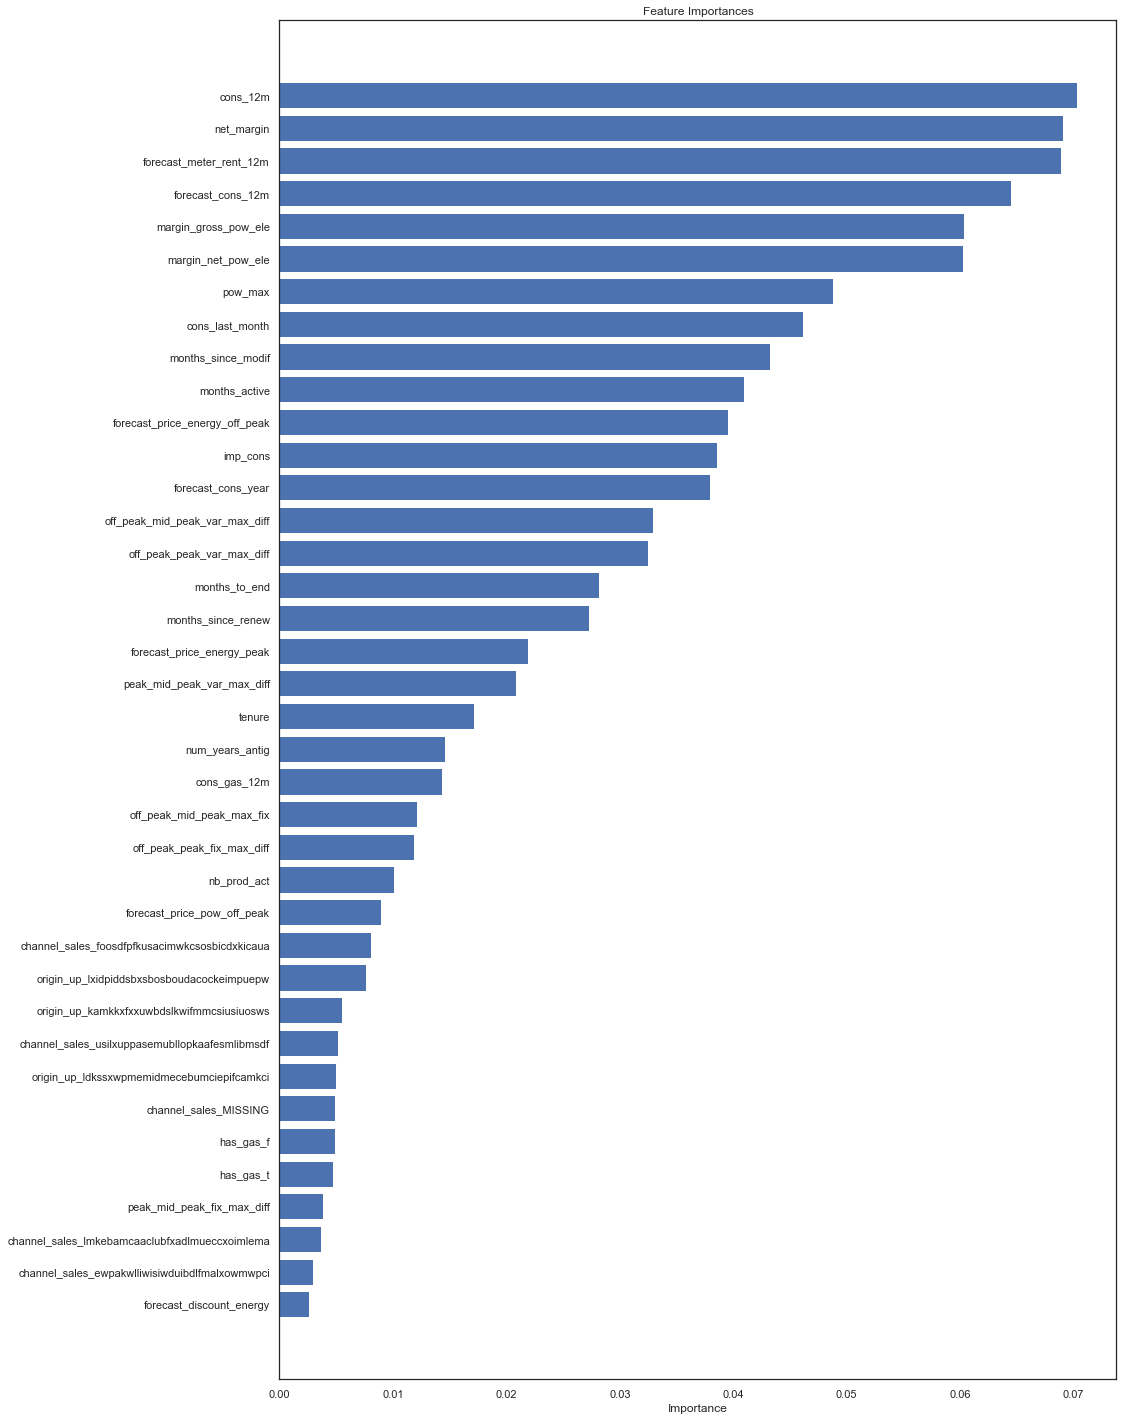

In [116]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

The highest drivers of churn from the histogram:
   - electricity consumption over the past 12 months 
   - and net margin
   - forecast meter rent for the following 12 months
   - other independent features seem to be of more importance but price not being one of those
    

# Model improvement 

Hyperparameter tuning 

In [117]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
proba_predictions = select.predict_proba(X_test)[:,1]

In [119]:
proba_predictions

array([0.114, 0.035, 0.234, ..., 0.049, 0.057, 0.025])

In [120]:
X_test= X_test.reset_index()
X_test

index  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0      7414  4.546654      0.000000         3.615740           2.323809   
1      8350  4.465189      0.000000         0.000000           3.631883   
2     12672  4.506140      0.000000         3.547529           3.395585   
3     13201  3.672744      4.230423         0.000000           2.853583   
4      1415  4.270003      0.000000         0.000000           3.302666   
...     ...       ...           ...              ...                ...   
2916   2056  4.281942      0.000000         0.000000           0.000000   
2917   3000  4.556664      4.703807         3.615845           3.569003   
2918   4121  3.413970      0.000000         2.930440           2.460763   
2919   3998  5.511454      0.000000         4.743518           3.232460   
2920  11751  4.869437      0.000000         3.783403           3.866574   

      forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0               0.000000                       0.0                 1.286905   
1               0.000000                       0.0                 1.797060   
2               3.484585                       0.0                 2.232691   
3               0.000000                       0.0                 1.290480   
4               0.000000                       0.0                 2.114778   
...                  ...                       ...                      ...   
2916            0.000000                       0.0                 0.000000   
2917            3.615845                       0.0                 2.166667   
2918            2.930440                       0.0                 1.238548   
2919            3.736635                       0.0                 1.985382   
2920            3.783403                       0.0                 2.121855   

      forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                           0.140621                    0.000000  ...   
1                           0.143478                    0.000000  ...   
2                           0.114588                    0.097701  ...   
3                           0.147506                    0.000000  ...   
4                           0.115360                    0.100243  ...   
...                              ...                         ...  ...   
2916                        0.000600                    0.000000  ...   
2917                        0.115174                    0.098837  ...   
2918                        0.165793                    0.088539  ...   
2919                        0.116509                    0.101397  ...   
2920                        0.111125                    0.094787  ...   

      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
2916                                           0   
2917                                           0   
2918                                           0   
2919                                           0   
2920                                           1   

      origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
2916                                           0   
2917                                           0   
2918                                           1   
2919                                           0   
2920                                           0   

      origin_up_lxidpiddsbxsb

In [122]:
X_test.head()

index  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0   7414  4.546654      0.000000         3.615740           2.323809   
1   8350  4.465189      0.000000         0.000000           3.631883   
2  12672  4.506140      0.000000         3.547529           3.395585   
3  13201  3.672744      4.230423         0.000000           2.853583   
4   1415  4.270003      0.000000         0.000000           3.302666   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 1.286905   
1            0.000000                       0.0                 1.797060   
2            3.484585                       0.0                 2.232691   
3            0.000000                       0.0                 1.290480   
4            0.000000                       0.0                 2.114778   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.140621                    0.000000  ...   
1                        0.143478                    0.000000  ...   
2                        0.114588                    0.097701  ...   
3                        0.147506                    0.000000  ...   
4                        0.115360                    0.100243  ...   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  channel_sales_MISSING  \
0                                           0                      0   
1                                           0                      1   
2                                           1                      0   
3                                           1                      0   
4                                           1                      0   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               1   
4                                               1   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  has_gas_f  has_gas_t  
0                                               0          1          0  
1                                               0          1          0  
2                                               0          1          0  
3                                               0          0          1  
4                                               0          1          0  

[5 rows x 39 columns]

In [123]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)

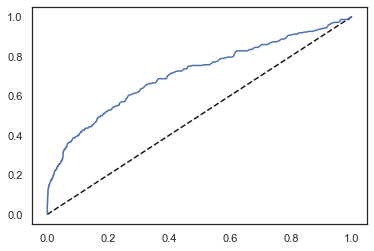

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')

In [125]:
roc_auc_score(y_test, proba_predictions)

0.7094896836460554

The model would be able to predict the customer's who've churned by 70.2% which is an average score. 

In [126]:
from sklearn.metrics import precision_recall_curve

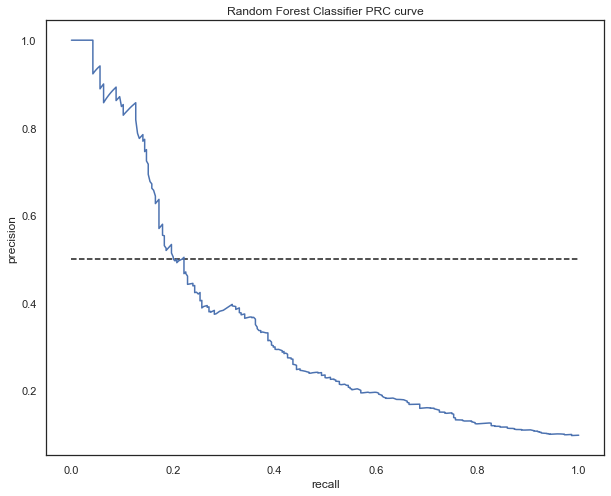

In [127]:
precision, recall, thresholds = precision_recall_curve(y_test, proba_predictions)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5,0.5],'k--')
plt.plot(recall, precision, label = 'RFC')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest Classifier PRC curve')
plt.show()

In [128]:
from sklearn.metrics import auc, average_precision_score

In [129]:
print(auc(recall,precision))

0.34306561504468414


Another result proving that the high accuracy of the model is of no significance here since the data provided is highly imbalanced leading to a very poor recall. This could also be a consequence of the model used. Would need more experimentation to build a better machine-learning model.

# XGBoost classifier 

In [130]:
X_train.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  11684.000000  11684.000000     11684.000000       11684.000000   
mean       4.219402      0.779856         2.257270           2.959604   
std        0.886546      1.719217         1.770862           0.687487   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753487      0.000000         0.000000           2.695063   
50%        4.148818      0.000000         2.899273           3.044018   
75%        4.607010      0.000000         3.527823           3.380345   
max        6.792889      6.618528         5.887169           4.787872   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        11684.000000              11684.000000             11684.000000   
mean             1.780352                  0.966707                 1.515063   
std              1.585581                  5.109032                 0.573000   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.234770   
50%              2.494155                  0.000000                 1.293804   
75%              3.242417                  0.000000                 2.120607   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    11684.000000                11684.000000   
mean                         0.137205                    0.050481   
std                          0.024696                    0.049001   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084066   
75%                          0.146348                    0.098837   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  ...  \
count                 11684.000000  ...   
mean                     43.117579  ...   
std                       4.596348  ...   
min                       0.000000  ...   
25%                      40.606701  ...   
50%                      44.311378  ...   
75%                      44.311378  ...   
max                      59.266378  ...   

       origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
count                                11684.000000   
mean                                     0.294591   
std                                      0.455878   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       origin_up_ldkssxwpmemidmecebumciepifcamkci  \
count                                11684.000000   
mean                                     0.214738   
std                                      0.410658   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       origin_up_lxidpiddsbxsbosboudacockeimpuepw  channel_sales_MISSING  \
count                                11684.000000           11684.000000   
mean                                     0.486049               0.254365   
std                                      0.499827               0.435522   
min                                      0.000000               0.000000   
25%                                      0.000000               0.000000   
50%                                      0.000000               0.000000   
75%                                      1.000000               1.000000   
max                                      1.000000         

In [131]:
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
print("Number transactions X_train dataset: ", X_train_xgb.shape)
print("Number transactions y_train dataset: ", y_train_xgb.shape)
print("Number transactions X_test dataset: ", X_test_xgb.shape)
print("Number transactions y_test dataset: ", y_test_xgb.shape)

Number transactions X_train dataset:  (11684, 39)
Number transactions y_train dataset:  (11684,)
Number transactions X_test dataset:  (2921, 39)
Number transactions y_test dataset:  (2921,)


In [132]:
#remove identifiers since these are string objects
train_identity_3 = X_train_xgb['id']
X_train_xgb = X_train_xgb.drop(columns = ['id'])
test_identity_3 = X_test_xgb['id']
X_test_xgb = X_test_xgb.drop(columns = ['id'])

In [133]:
xgbc = XGBClassifier() 

In [134]:
xgbc.fit(X_train_xgb,y_train_xgb)

C:\Users\NAMEERA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:

#prediction
prediction_xgb = xgbc.predict(X_test_xgb)

#confusion matrix and scores
#RFC
ypred = prediction_xgb
model = xgbc
#ravel() used for a flattenned contiguous array
tn, fp, fn, tp = confusion_matrix(y_test_xgb, ypred).ravel()

print ('Confusion Matrix:')

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print('\nAccuracy:', accuracy_score(y_test_xgb, ypred))
print("Overall Precision:",precision_score(y_test_xgb, ypred))
print("Overall Recall:",recall_score(y_test_xgb, ypred))
print("Overall f1-score:", f1_score(y_test_xgb, ypred))
auc = roc_auc_score(y_test_xgb,ypred)
plt.show()


Confusion Matrix:
True positives: 40
False positives: 18
True negatives: 2619
False negatives: 244


Accuracy: 0.9103046901745977
Overall Precision: 0.6896551724137931
Overall Recall: 0.14084507042253522
Overall f1-score: 0.23391812865497078


increase in recall but decrease in precision

In [136]:
proba_predictions_xgb = xgbc.predict_proba(X_test_xgb)[:,1]

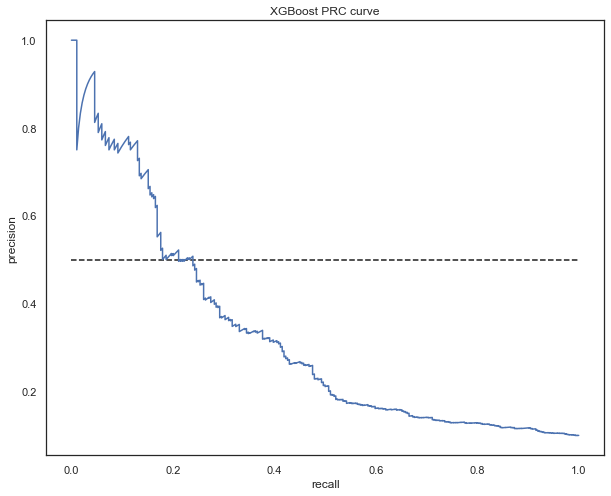

In [141]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, proba_predictions_xgb)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5,0.5],'k--')
plt.plot(recall, precision, label = 'XGB')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('XGBoost PRC curve')
plt.show()

Learning from unbalanced data may be an unruly task since the minority class is infinitesimal in comparison.

After trial with oversampling and undersampling techniques with random forest classifier technique and XGBoost classifier, the model seems to be at its prime when it is used as a standalone. 
- With increase in model complexity, the metrics generated plummeting results. 
- Oversampling and undersampling with random forest classifier had worse effects.
- Logistic regression is a model too simple for this dataset. 

Hence, choosing random forest classifier is far more favourable with a little more experimentation in the hyperparameter tuning. 